In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv("dataset.csv")

In [120]:
df = df[df['countriesAndTerritories'] == "Georgia"]
df = df[df['cases'] > 0]
df = df.iloc[::-1]

In [121]:
y = df['cases']

In [122]:
days = y.count()

In [123]:
x = np.arange(days)

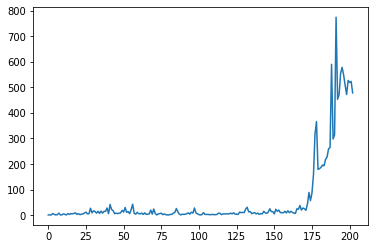

In [124]:
plt.plot(x, y)
# covid current situation in georgia:

In [125]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [126]:
model = LinearRegression()

In [127]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)

In [128]:
# normalize
x_train = pd.DataFrame(x)
y_train = y.to_numpy()

x_poly = poly_features.fit_transform(x_train)

In [129]:
model.fit(x_poly, y_train)
model.intercept_, model.coef_

(29.19238239180364,
 array([-3.53941973e+00,  1.15306123e-01, -1.21712858e-03,  3.98541526e-06]))

In [130]:
x_test_nums = np.arange(220, 300)
x_test = pd.DataFrame(x_test_nums)

In [131]:
y_current_state = model.predict(x_poly)

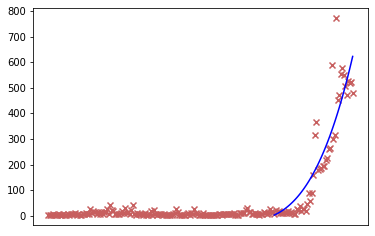

In [132]:
plt.plot(x[150:], y_current_state[150:], color="blue")
plt.scatter(x, y_train, color="#C75F5F", marker='x')
plt.xticks([])
plt.show()

In [133]:
x_test_nums = np.arange(203, 233)
x_test = pd.DataFrame(x_test_nums)
x_test_poly = poly_features.fit_transform(x_test)

In [134]:
y_hat = model.predict(x_test_poly)

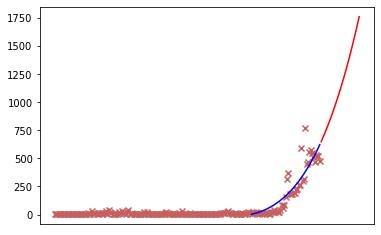

In [135]:
plt.plot(x[150:], y_current_state[150:], color="blue")
plt.plot(x_test_nums, y_hat, color="red")
plt.scatter(x, y_train, color="#C75F5F", marker='x')
plt.xticks([])
plt.show()